## Task 2
## Predicting House Prices with Regression
# Objective
Learn how to preprocess real-world housing data, engineer features, apply regression modeling, and evaluate the model's performance in predicting house prices.
# Introduction
In this task, we focus on predicting housing prices using a regression approach. The dataset, sourced from the California Housing dataset, includes features such as the number of bedrooms, total rooms, population, households, and proximity to the ocean. The goal is to apply data preprocessing, perform exploratory data analysis, engineer meaningful features, and then train a linear regression model to predict the median house value.

This task builds real-world machine learning skills, including handling skewed data, encoding categorical variables, avoiding data leakage, and evaluating models using metrics like MAE, RMSE, and R². Additionally, visualization techniques such as correlation heatmaps and prediction plots help better understand feature relationships and model behavior.
# Overview
The workflow starts with loading and cleaning the dataset by handling missing values. Skewed features were log-transformed to normalize their distributions. Before feature engineering, a correlation heatmap was used to assess linear relationships and justify creating a ratio feature. The categorical feature ocean_proximity was encoded using one-hot encoding.

After preparing the dataset, the features were standardized using StandardScaler (fitted only on training data to avoid data leakage). A Linear Regression model was then trained and evaluated using MAE, RMSE, and R². Lastly, actual vs. predicted prices were visualized using a scatterplot.
# Summary
Task 2 focused on building a linear regression model to predict house prices using the California housing dataset. The data was cleaned by removing missing values and transformed using log-scaling to handle skewed features. A correlation heatmap guided the feature engineering process, including the creation of a new variable, bedroom_ratio. Categorical data was handled using one-hot encoding. The dataset was then split into training and testing sets, and feature scaling was applied using StandardScaler to prevent data leakage. After training the model, performance was evaluated using MAE, RMSE, and R², showing reasonable predictive accuracy.

before
after


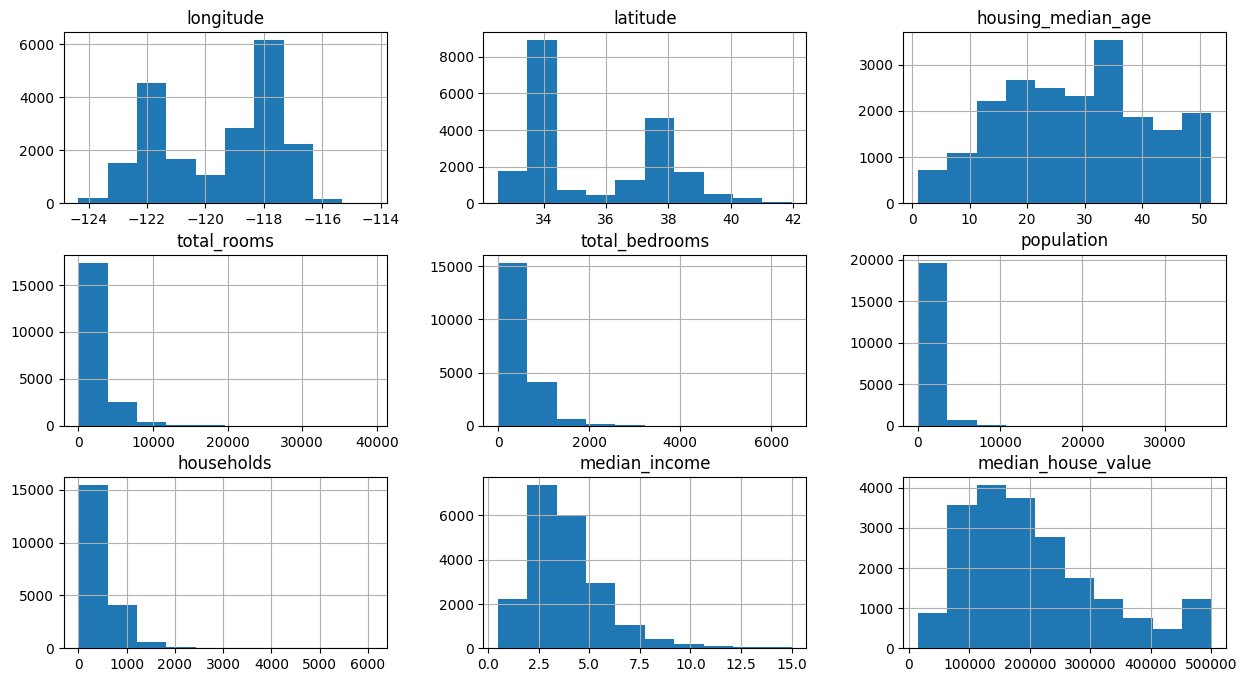

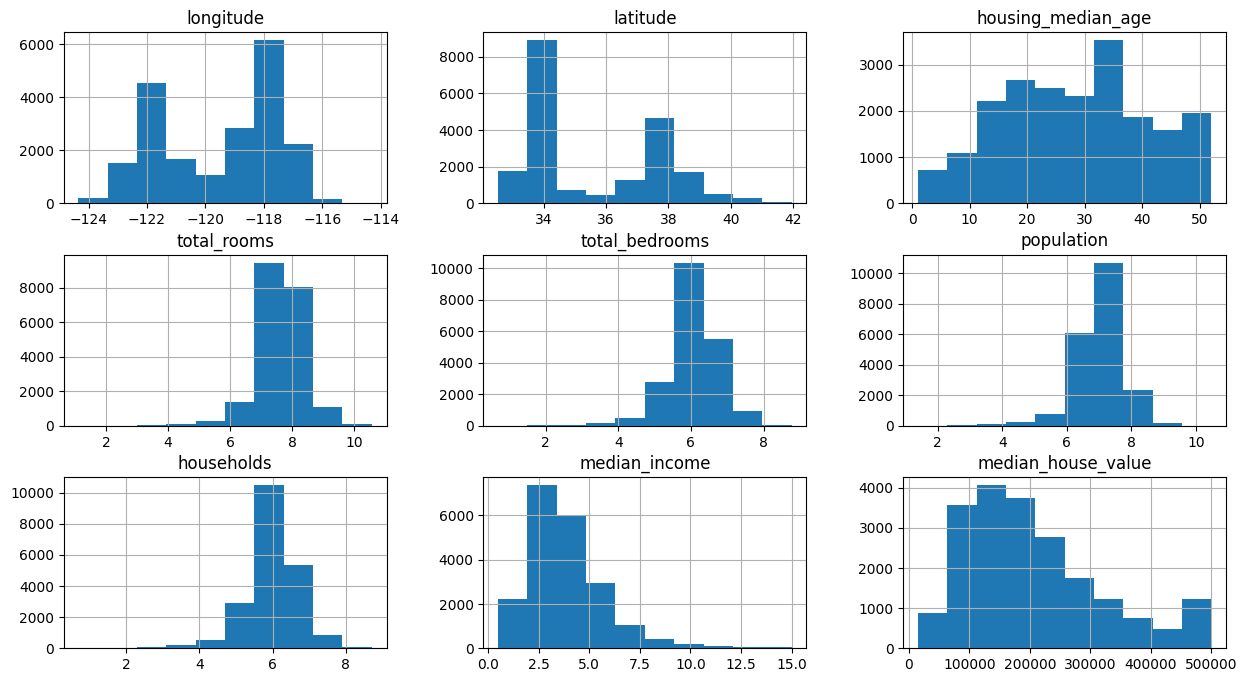

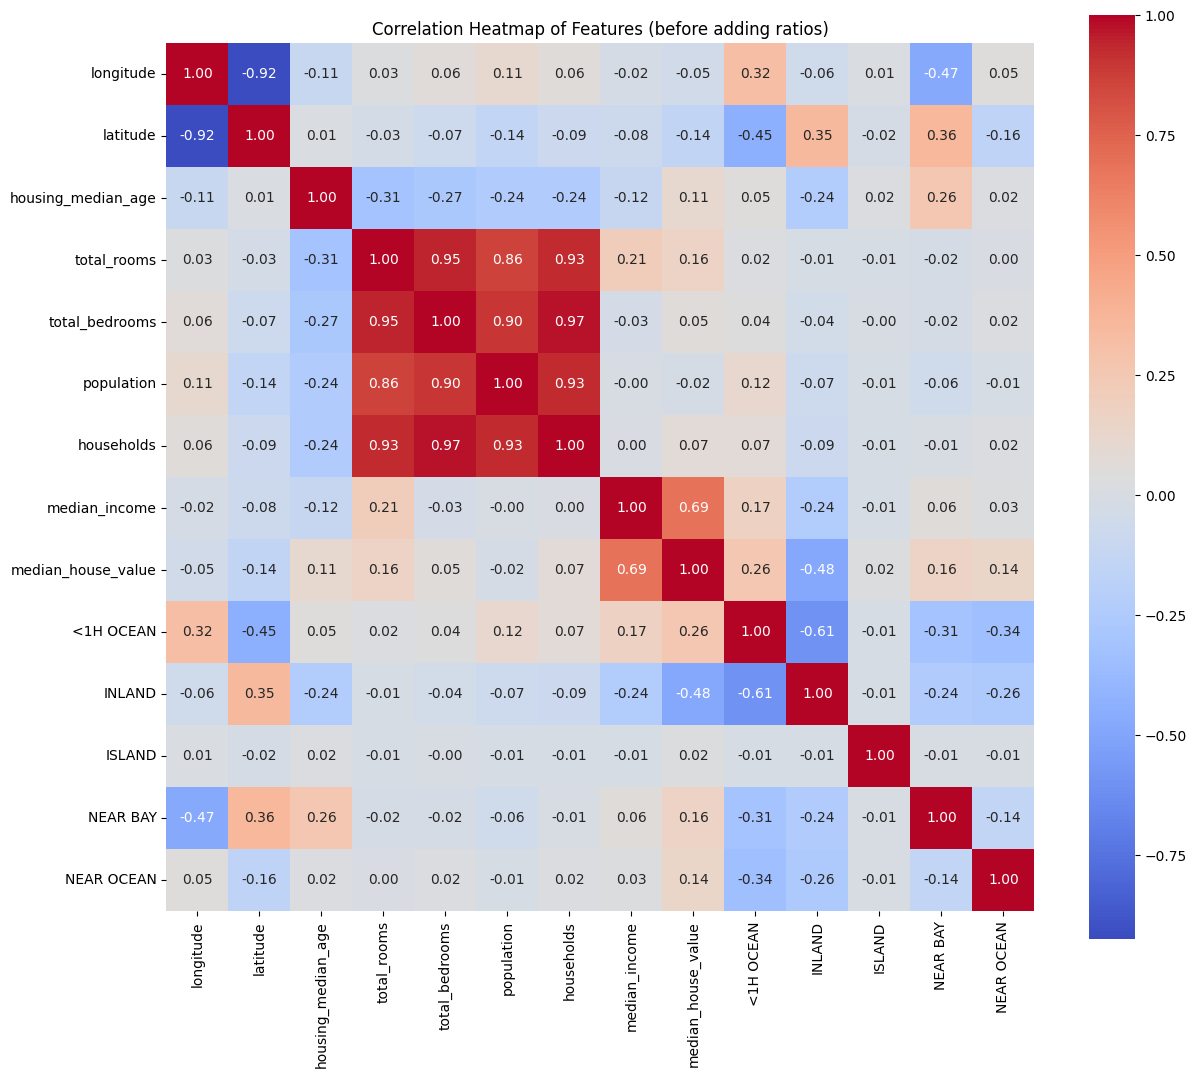

Model Performance:
MAE:  48125.73
RMSE: 65950.57
R²:   0.6729


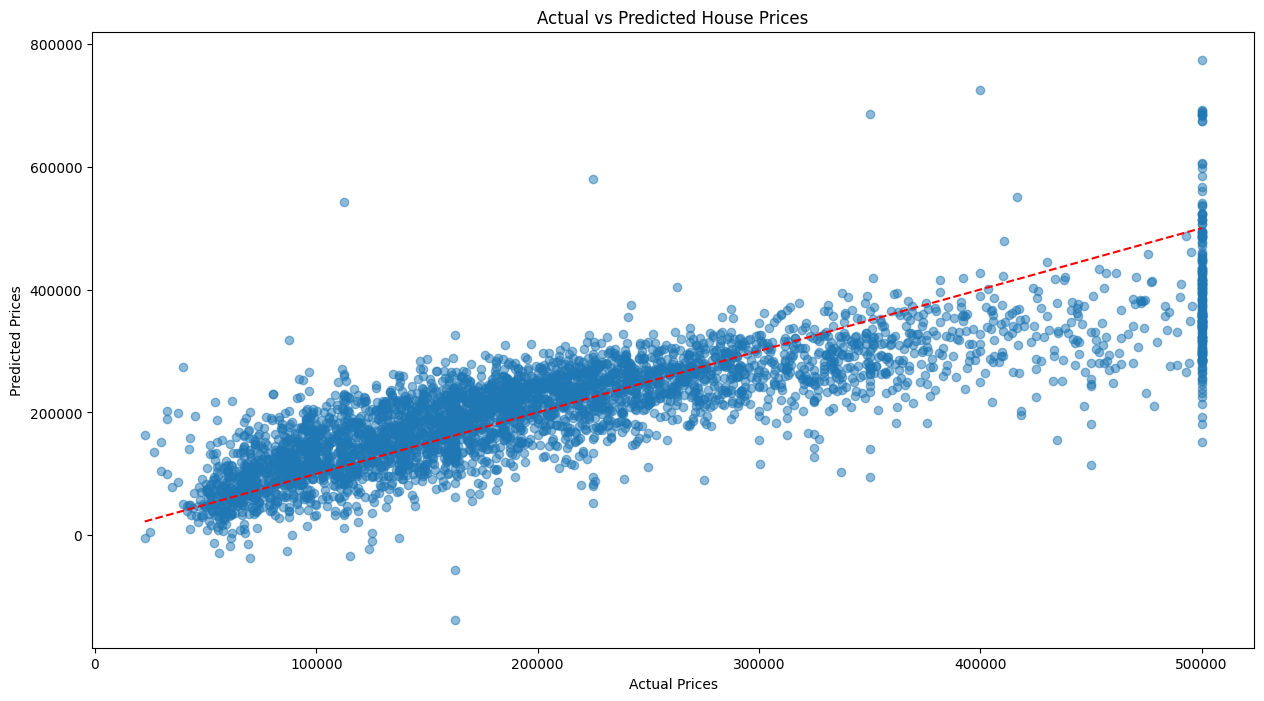

In [14]:
# Step 1: Import libraries
import pandas as pd  # for data manipulation
import numpy as np  # for numerical operations
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # for advanced visualizations
from sklearn.model_selection import train_test_split  # to split dataset
from sklearn.preprocessing import StandardScaler  # for feature scaling
from sklearn.linear_model import LinearRegression  # model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # evaluation metrics

# Step 2: Load & clean data
data = pd.read_csv('housing.csv')  # Load dataset
data.dropna(inplace=True)  # Remove rows with missing values

# Step 3: Feature Engineering
# Visualize the distribution of features before transformation
print('before')
data.hist(figsize=(15, 8))  # plot histograms of all numerical features

# Log-transform skewed numerical features to reduce skewness and normalize distribution
data['total_rooms'] = np.log(data['total_rooms'] + 1)
data['total_bedrooms'] = np.log(data['total_bedrooms'] + 1)
data['population'] = np.log(data['population'] + 1)
data['households'] = np.log(data['households'] + 1)

# Visualize the distribution of features after transformation
print('after')
data.hist(figsize=(15, 8))  # plot histograms of all numerical features

#Correlation heatmap
# This helps to analyze which features are strongly correlated with the target
plt.figure(figsize=(14, 12))
corr_matrix = data.join(pd.get_dummies(data['ocean_proximity'], dtype=int)).corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Features (before adding ratios)")
plt.show()

# Ratio feature: bedrooms to total rooms
# Added based on correlation analysis
data['bedroom_ratio'] = data['total_bedrooms'] / data['total_rooms']

# Step 4: One-hot encode categorical feature
# Converts 'ocean_proximity' into numeric columns (0/1 for each category,converting them into features)
data = data.join(pd.get_dummies(data['ocean_proximity'], dtype=int)).drop(['ocean_proximity'], axis=1)

# Step 5: Separate features and target
# X contains features, y contains the target (house value)
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

# Step 6: Train-test split
# 80% training data, 20% test data (for model evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Step 7: Feature scaling (fit on training only to avoid leakage)
# Standardize features (mean = 0, std = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit and transform training data
X_test_scaled = scaler.transform(X_test)  # only transform test data

# Step 8: Train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)  # train model using scaled training data

# Step 9: Predictions
y_pred = model.predict(X_test_scaled)  # make predictions on test data

# Step 10: Evaluation
# MAE: average error
# RMSE: penalizes large errors
# R²: how much variance in target is explained by the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Model Performance:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

# Plot predictions vs actual values
plt.figure(figsize=(15, 8))
plt.scatter(y_test, y_pred, alpha=0.5)  # scatter plot of actual vs predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
